# Time series II

In [1]:
import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR,LinearSVR


import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


from statsmodels.tsa.deterministic import DeterministicProcess
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.statespace.sarimax import SARIMAX


import warnings
warnings.filterwarnings("ignore")

# Get data 

            electricity
datetime               
1956-03-01         3923
1956-06-01         4436
1956-09-01         4806
1956-12-01         4418
1957-03-01         4339


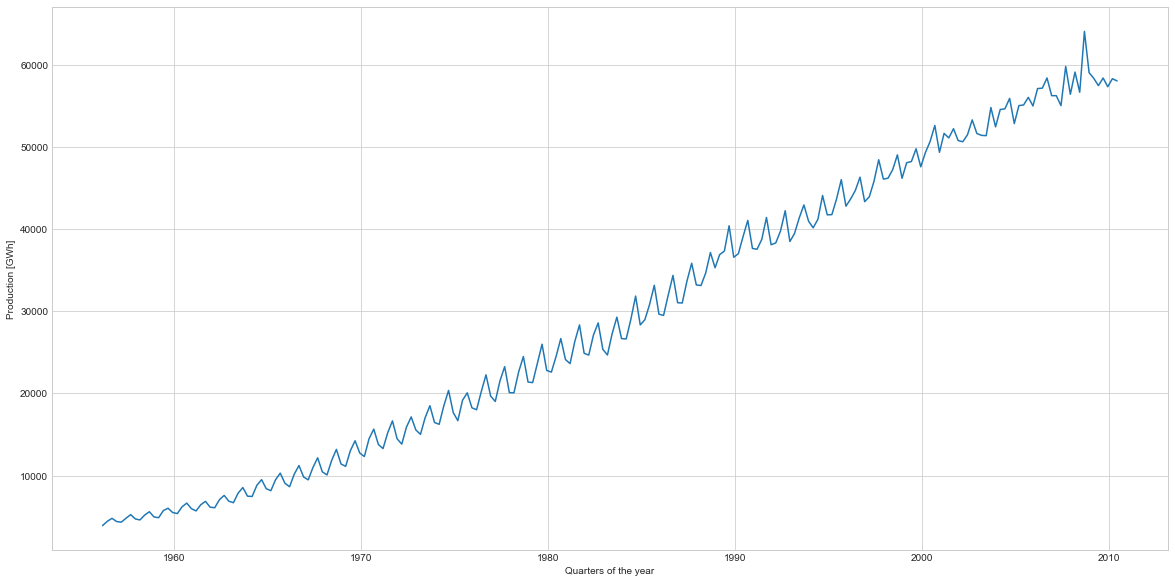

In [2]:
df = pd.read_excel('data/Australia_electricty_data.xlsx')
df = df.rename(columns={"Unnamed: 0":"datetime", "Electricity [GWh]": "electricity"})
df.set_index('datetime',inplace=True)

print(df.head(5))

plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(20,10))
p = sns.lineplot(data= df);
p.set_ylabel("Production [GWh]");
p.set_xlabel("Quarters of the year");

plt.legend('', frameon=False);
plt.show()

In [3]:
dfs = df.loc['1956-03-01':'1968-12-01']

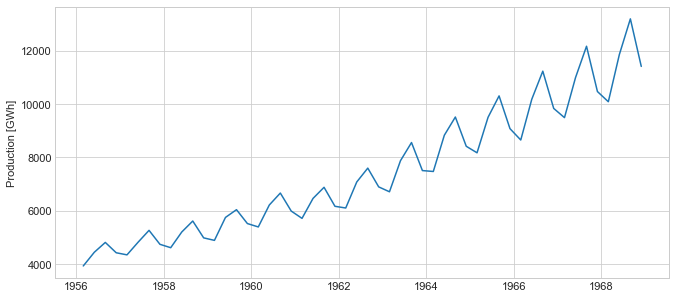

In [4]:
plt.figure(figsize=(11, 5))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.plot(dfs['electricity'])
plt.ylabel('Production [GWh]', fontsize=11)
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller
fuller = adfuller(dfs['electricity'])
print('ADF Statistic: %f' % fuller[0])
print('p-value: %f' % fuller[1])
print('Critical Values:')
for key, value in fuller[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.233387
p-value: 0.998909
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


## Decomposition

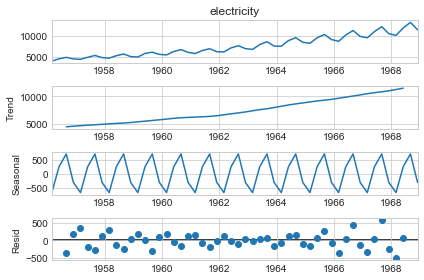

In [64]:
decompose = seasonal_decompose(dfs['electricity'],
                               model='additive', period=4)
decompose.plot();
plt.show();

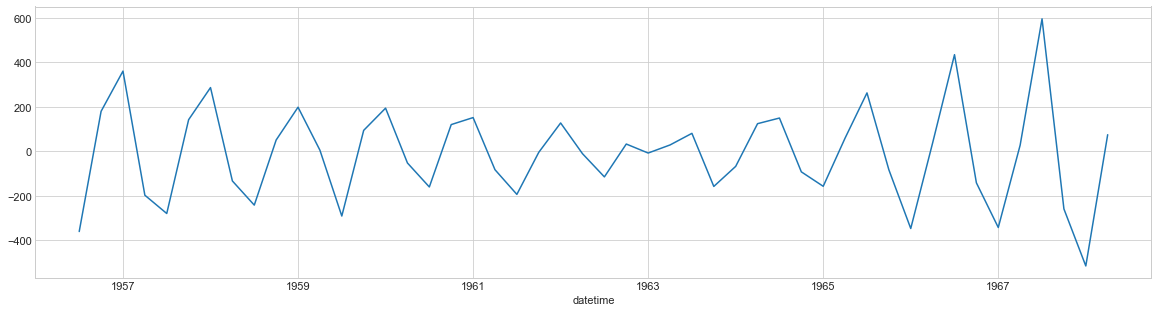

In [7]:
plt.figure(figsize=(20,5))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('datetime', fontsize=11)
decompose.resid.plot();

In [8]:
from statsmodels.tsa.stattools import adfuller
fuller = adfuller(decompose.resid.dropna())
print('ADF Statistic: %f' % fuller[0])
print('p-value: %f' % fuller[1])
print('Critical Values:')
for key, value in fuller[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.701448
p-value: 0.000000
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602


## Data transformation

In [9]:
au_elec_series_short_seas = dfs.diff(4).dropna()

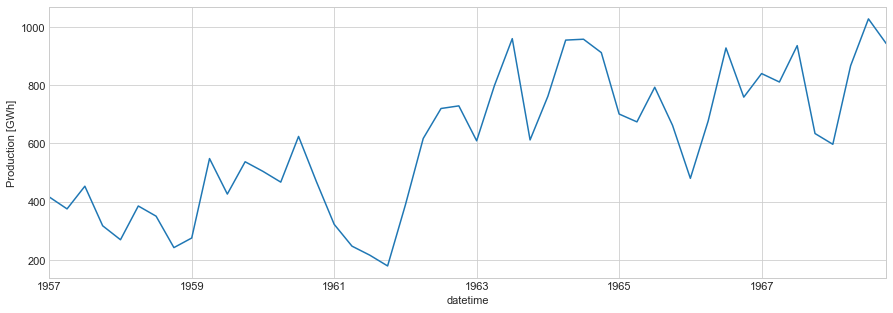

In [10]:
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Production [GWh]', fontsize=11)
plt.xlabel('datetime', fontsize=11)
au_elec_series_short_seas['electricity'].plot(figsize=(15,5));

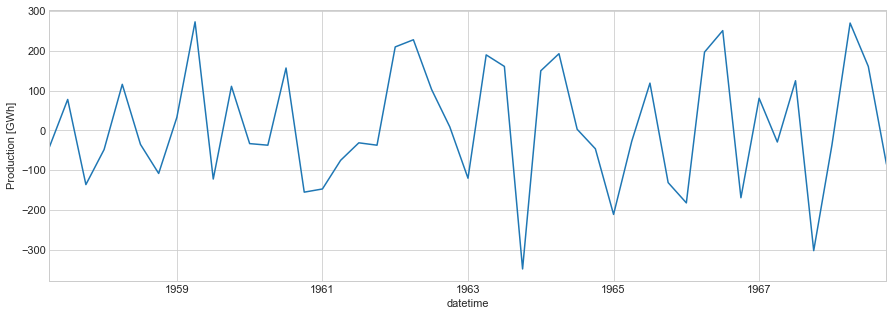

In [11]:
au_elec_series_short_diff = au_elec_series_short_seas.diff().dropna()

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Production [GWh]', fontsize=11)
plt.xlabel('datetime', fontsize=11)
au_elec_series_short_diff['electricity'].plot(figsize=(15,5));

In [12]:
from statsmodels.tsa.stattools import adfuller
fuller = adfuller(au_elec_series_short_diff['electricity'])
print('ADF Statistic: %f' % fuller[0])
print('p-value: %f' % fuller[1])
print('Critical Values:')
for key, value in fuller[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.215759
p-value: 0.000000
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602


# ACF

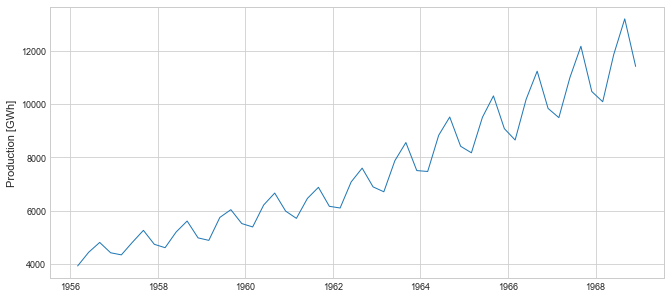

In [13]:
plt.figure(figsize=(11, 5))
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.ylabel('Production [GWh]', fontsize=11)
plt.plot(dfs['electricity'], lw=1)
plt.show()

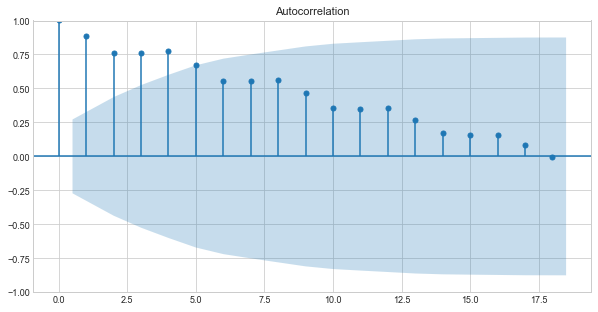

In [14]:
fig = plot_acf(dfs['electricity'])
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title ('Autocorrelation', fontsize=11)
fig.set_size_inches((10, 5))

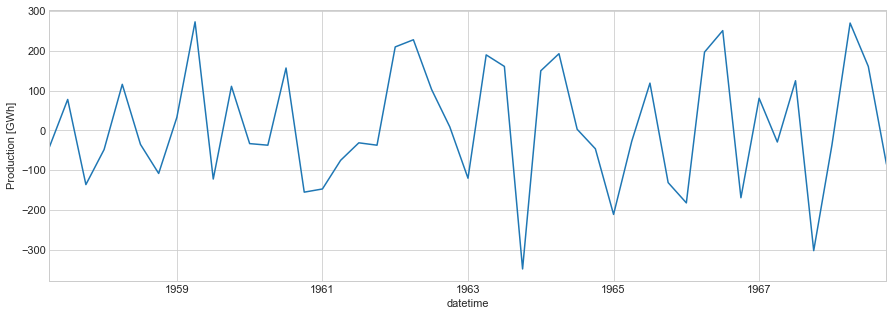

In [15]:
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Production [GWh]', fontsize=11)
plt.xlabel('datetime', fontsize=11)
au_elec_series_short_diff['electricity'].plot(figsize=(15,5));

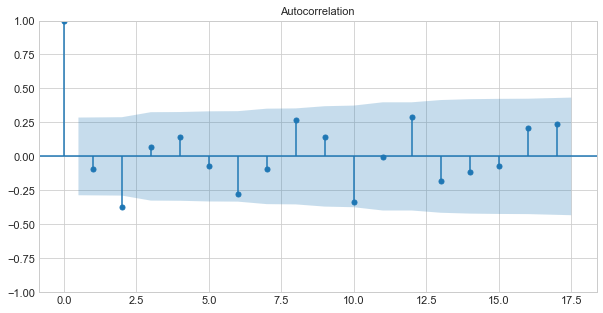

In [16]:
fig = plot_acf(au_elec_series_short_diff['electricity'])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title ('Autocorrelation', fontsize=11)
fig.set_size_inches((10, 5))

## PACF

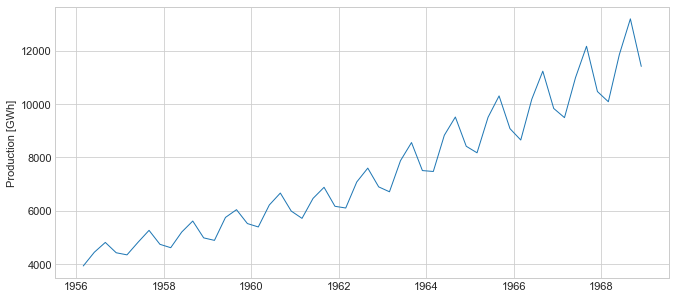

In [17]:
plt.figure(figsize=(11, 5))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Production [GWh]', fontsize=11)
plt.plot(dfs['electricity'], lw=1)
plt.show()

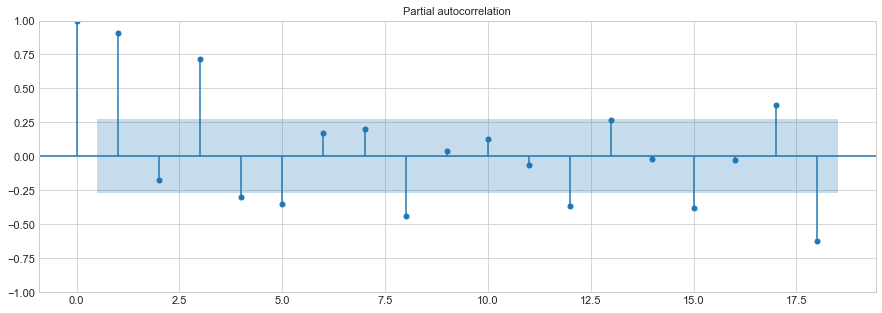

In [18]:
fig = plot_pacf(dfs['electricity'])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Partial autocorrelation', fontsize=11)
fig.set_size_inches((15, 5))

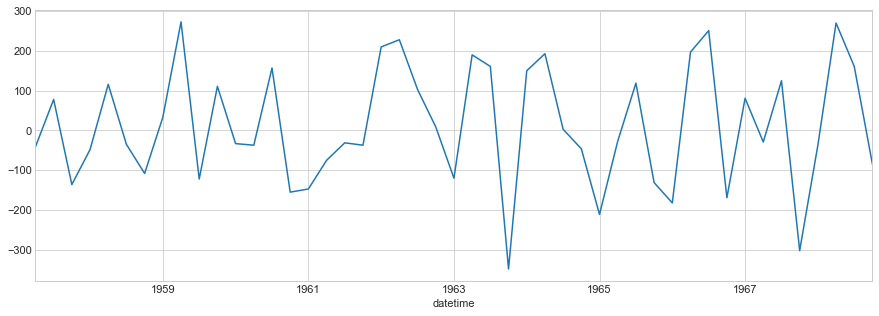

In [19]:
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('datetime', fontsize=11)
au_elec_series_short_diff['electricity'].plot(figsize=(15,5));

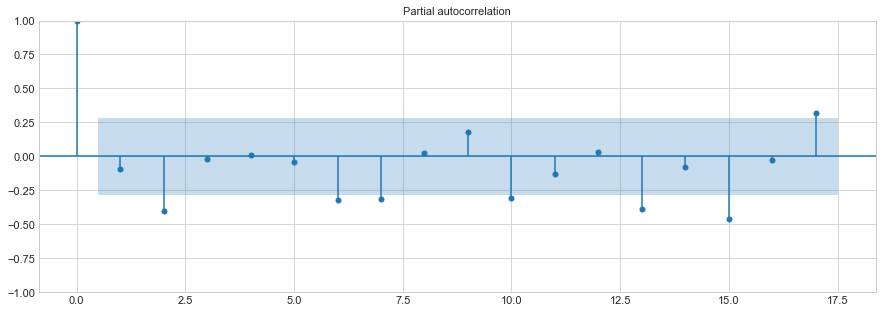

In [20]:
fig = plot_pacf(au_elec_series_short_diff['electricity'])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Partial autocorrelation', fontsize=11)
fig.set_size_inches((15, 5))

## Autoregressive models
https://www.alldatascience.com/time-series/forecasting-time-series-with-arima/

https://analyticsindiamag.com/topics/sarimax-in-python-for-time-series-modeling/

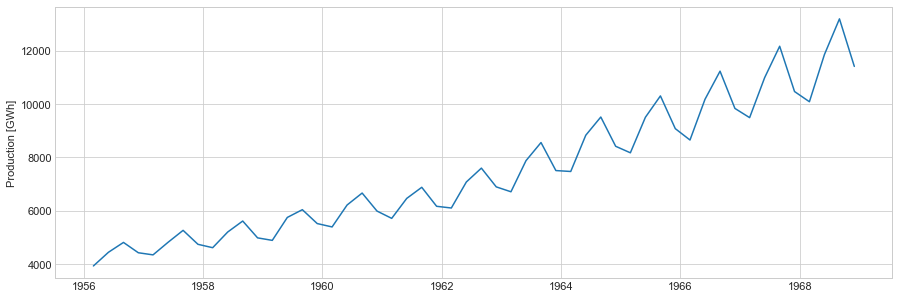

In [21]:
plt.figure(figsize=(15, 5))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.plot(dfs['electricity'])
plt.ylabel('Production [GWh]', fontsize=11)
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller
fuller = adfuller(dfs['electricity'])
print('ADF Statistic: %f' % fuller[0])
print('p-value: %f' % fuller[1])
print('Critical Values:')
for key, value in fuller[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.233387
p-value: 0.998909
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


## Decomposition + model

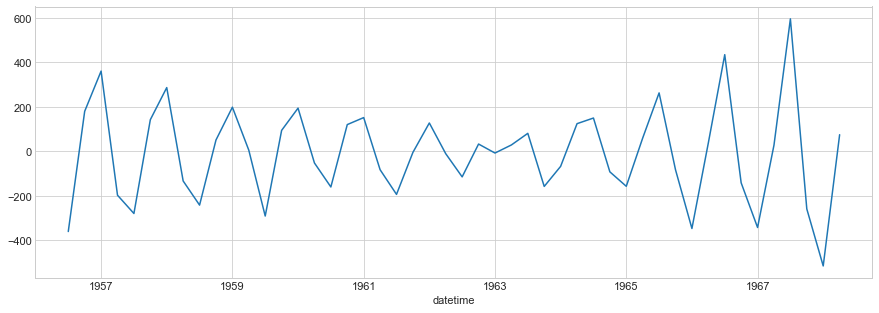

In [23]:
plt.figure(figsize=(15,5))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('datetime', fontsize=11)
decompose.resid.plot();

In [24]:
from statsmodels.tsa.stattools import adfuller
fuller = adfuller(decompose.resid.dropna())
print('ADF Statistic: %f' % fuller[0])
print('p-value: %f' % fuller[1])
print('Critical Values:')
for key, value in fuller[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.701448
p-value: 0.000000
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602


In [25]:
res = pd.DataFrame(decompose.resid.dropna())

In [26]:
import pmdarima as pm
auto_arima = pm.auto_arima(res['resid'], stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(5, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

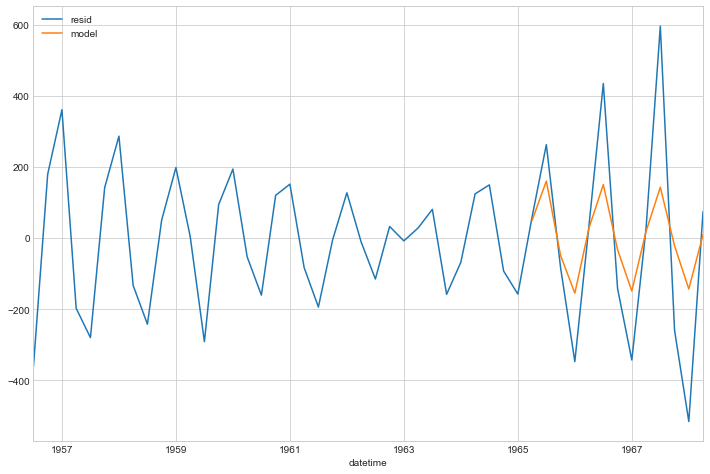

In [27]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(res['resid'],order=(5,0,0))
history = model.fit()

res['model'] = history.predict(start=35,end=80,dynamic=True)
res[['resid','model']].plot(figsize=(12,8));

In [28]:
print(history.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                   48
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -272.051
Date:                Thu, 31 Oct 2024   AIC                            558.101
Time:                        09:55:59   BIC                            571.200
Sample:                    09-01-1956   HQIC                           563.051
                         - 06-01-1968                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4102      2.444     -0.986      0.324      -7.200       2.380
ar.L1         -0.6017      0.154     -3.914      0.000      -0.903      -0.300
ar.L2         -1.1339      0.188     -6.029      0.0

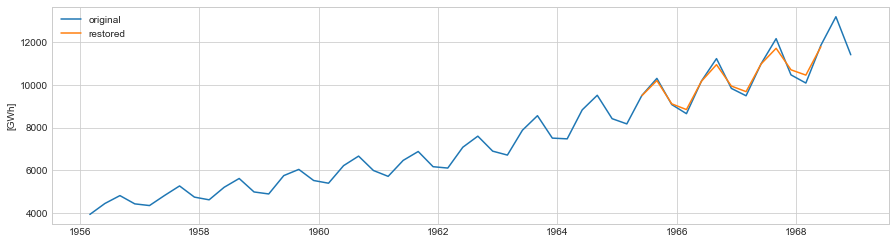

In [29]:
plt.figure(figsize=(15,4))
plt.plot(dfs['electricity'], label="original")
plt.plot(res['model'] + decompose.trend + decompose.seasonal, label="restored")
plt.ylabel('[GWh]')
plt.legend(loc="upper left")
plt.show()

## Transformation + model

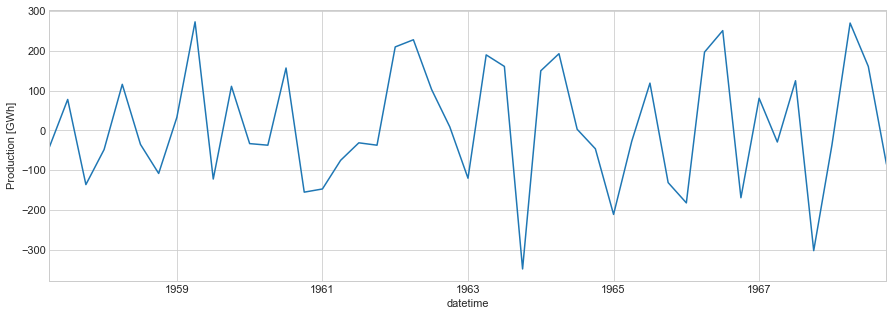

In [30]:
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Production [GWh]', fontsize=11)
plt.xlabel('datetime', fontsize=11)
au_elec_series_short_diff['electricity'].plot(figsize=(15,5));

In [31]:
from statsmodels.tsa.stattools import adfuller
fuller = adfuller(au_elec_series_short_diff['electricity'])
print('ADF Statistic: %f' % fuller[0])
print('p-value: %f' % fuller[1])
print('Critical Values:')
for key, value in fuller[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.215759
p-value: 0.000000
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602


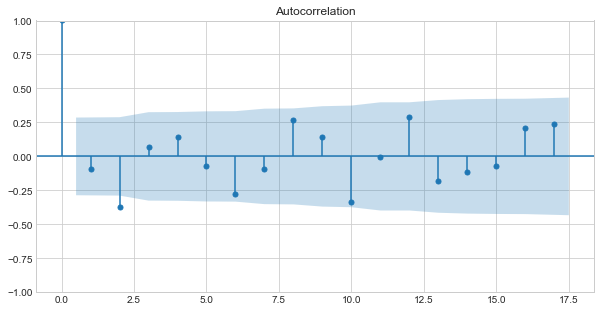

In [65]:
acf_plot = plot_acf(au_elec_series_short_diff['electricity'])
acf_plot.set_size_inches((10, 5))

# MA =2

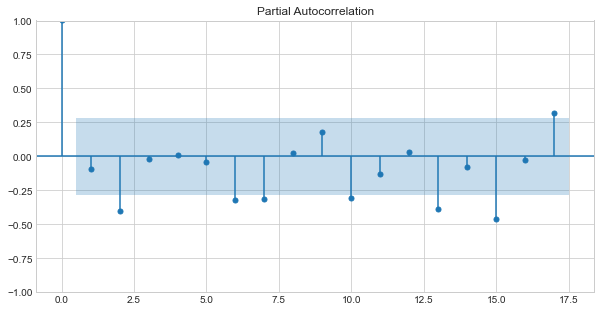

In [66]:
pacf_plot = plot_pacf(au_elec_series_short_diff['electricity'])
pacf_plot.set_size_inches((10, 5))

# AR = 2

In [34]:
train_end = datetime.datetime(1968,3,1)
test_start = datetime.datetime(1968,6,1)
test_end = datetime.datetime(1968,12,1)

train_data = au_elec_series_short_diff[:train_end]
test_data = au_elec_series_short_diff[test_start:test_end]

In [35]:
import pmdarima as pm
auto_arima = pm.auto_arima(train_data, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [36]:
from statsmodels.tsa.arima.model import ARIMA

# define the model
model = ARIMA(train_data, order=(2,0,2))

# fit the model
model_fit = model.fit()

# summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            electricity   No. Observations:                   44
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -277.270
Date:                Thu, 31 Oct 2024   AIC                            566.539
Time:                        09:56:00   BIC                            577.244
Sample:                    06-01-1957   HQIC                           570.509
                         - 03-01-1968                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6923     18.744      0.250      0.802     -32.045      41.430
ar.L1          0.0975      0.217      0.449      0.653      -0.328       0.523
ar.L2         -0.9488      0.144     -6.566      0.0

In [37]:
# get prediction start and end dates: training data
pred_start_date = train_data.index[0]
pred_end_date = train_data.index[-1]

In [38]:
validations = model_fit.predict(start=pred_start_date, end=pred_end_date)


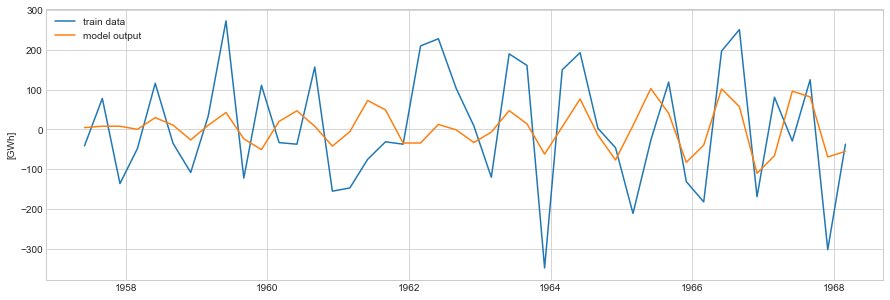

In [39]:
plt.figure(figsize=(15,5))
plt.plot(train_data, label="train data")
plt.plot(validations, label="model output")
plt.ylabel('[GWh]')
plt.legend(loc="upper left")
plt.show()

## Residuals

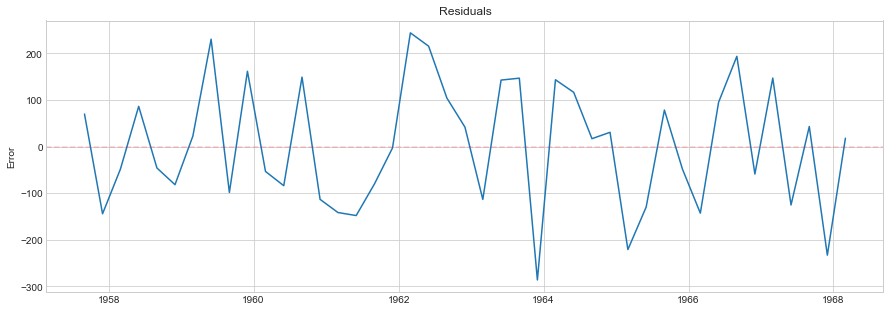

In [40]:
fig_res = plt.figure(figsize=(15,5))
residuals = model_fit.resid[1:]
plt.plot(residuals)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
plt.title('Residuals')
plt.ylabel('Error')
plt.show()

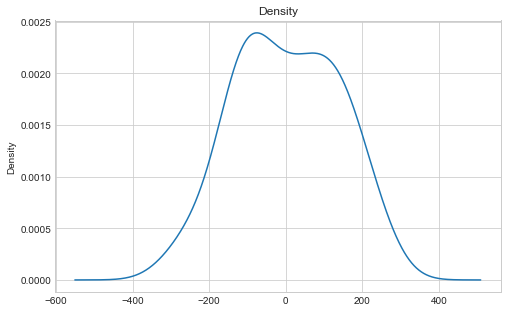

In [41]:
fig_dens_res = plt.figure(figsize=(8,5))
residuals.plot(title='Density', kind='kde')
plt.show()

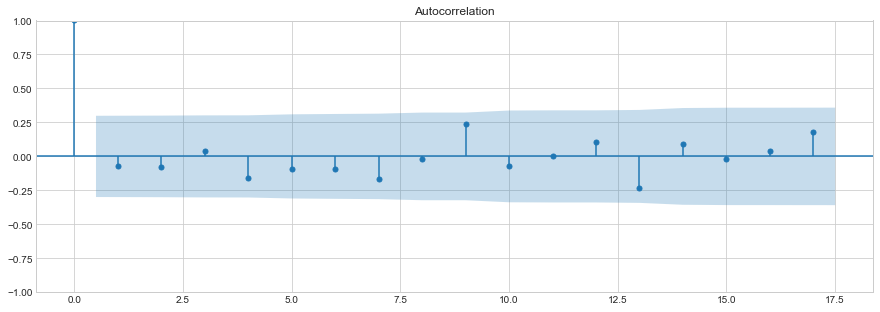

In [42]:
fig_acf_resid = plot_acf(residuals)
fig_acf_resid.set_size_inches((15, 5))

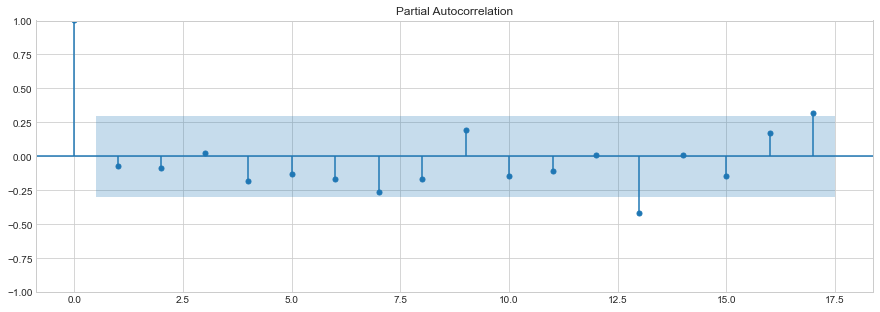

In [43]:
fig_pacf_resid = plot_pacf(residuals)
fig_pacf_resid.set_size_inches((15, 5))

## Restore

### CUMSUM

In [44]:
a = np.array([10, 11, 12, 13, 14, 15])

In [45]:
np.cumsum(a)

array([10, 21, 33, 46, 60, 75])

In [46]:
def integrate(values):
    x = np.cumsum(values)
    return x


In [47]:
def differentiate(values):  
    x = np.concatenate([[values[0]], values[1:]-values[:-1]])
    return x

In [48]:
dd = differentiate(a)
dd

array([10,  1,  1,  1,  1,  1])

In [49]:
i = integrate(dd)
i

array([10, 11, 12, 13, 14, 15])

### Restore data

In [50]:
validations_df = pd.DataFrame(data=validations)
validations_df_rnm = validations_df.rename(columns={"predicted_mean": "electricity"})

In [51]:
valid_mrg = pd.concat([au_elec_series_short_seas.iloc[[0]], 
                       validations_df_rnm], ignore_index = False)

In [52]:
valid_mrg_cums = valid_mrg.cumsum()

In [53]:
valid_mrg_cums_mrg = pd.concat([dfs.iloc[0:4], 
                                valid_mrg_cums], ignore_index = False)

In [54]:
dfQ1sl = valid_mrg_cums_mrg[::4]
dfQ2sl = valid_mrg_cums_mrg[1::4]
dfQ3sl = valid_mrg_cums_mrg[2::4]
dfQ4sl = valid_mrg_cums_mrg[3::4]

dfQ1slCUM = dfQ1sl.cumsum()
dfQ2slCUM = dfQ2sl.cumsum()
dfQ3slCUM = dfQ3sl.cumsum()
dfQ4slCUM = dfQ4sl.cumsum()

In [55]:
dfCUMf = pd.concat([dfQ1slCUM, dfQ2slCUM, dfQ3slCUM, dfQ4slCUM], ignore_index = False)
dfCUMfsorted = dfCUMf.sort_index()

In [56]:
audropped = dfs.drop(index=['1968-06-01','1968-09-01','1968-12-01'])

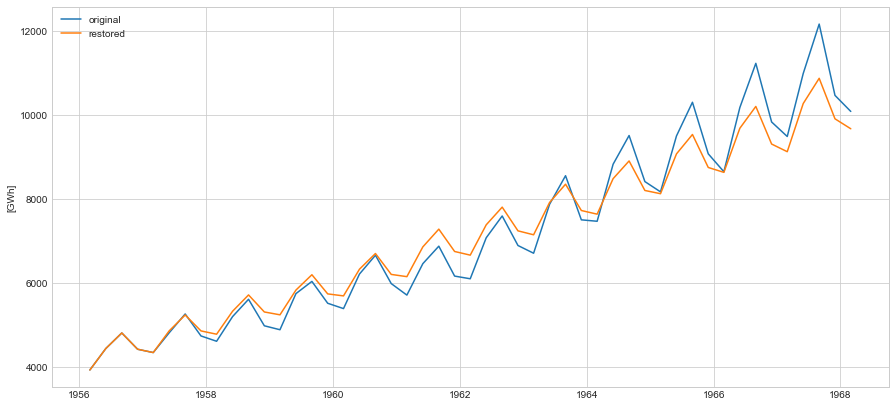

In [57]:
plt.figure(figsize=(15,7))
plt.plot(audropped, label="original")
plt.plot(dfCUMfsorted, label="restored")
plt.ylabel('[GWh]')
plt.legend(loc="upper left")
plt.show()

## One row solution

In [60]:
model = sm.tsa.statespace.SARIMAX(dfs['electricity'],order=(2, 1, 2),seasonal_order=(1,1,1,4))
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18954D+00    |proj g|=  9.46568D-01

At iterate    5    f=  5.73021D+00    |proj g|=  2.59463D-02

At iterate   10    f=  5.72525D+00    |proj g|=  5.39365D-02

At iterate   15    f=  5.71142D+00    |proj g|=  2.25968D-02

At iterate   20    f=  5.69735D+00    |proj g|=  2.05851D-02

At iterate   25    f=  5.68512D+00    |proj g|=  1.91260D-03

At iterate   30    f=  5.67351D+00    |proj g|=  1.52542D-02

At iterate   35    f=  5.66956D+00    |proj g|=  2.65190D-03

At iterate   40    f=  5.66938D+00    |proj g|=  4.40549D-04
  ys=-1.199E-03  -gs= 3.811E-04 BFGS update SKIPPED

At iterate   45    f=  5.66324D+00    |proj g|=  2.17874D-02

At iterate   50    f=  5.65893D+00    |proj g|=  1.38075D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.


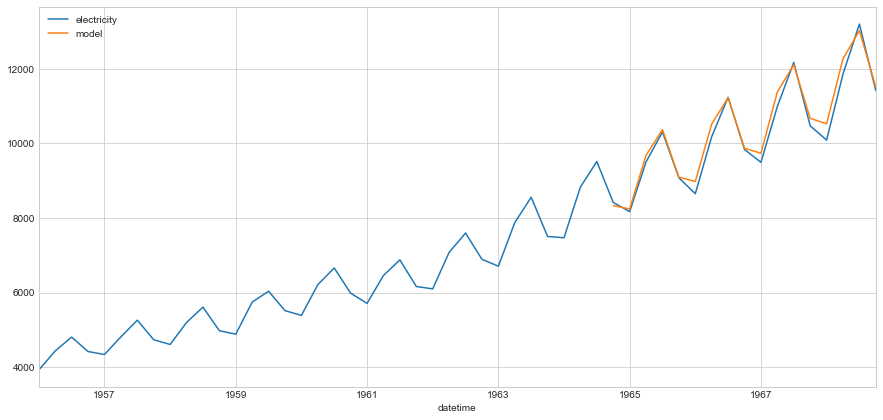

In [68]:
dfs['model'] = results.predict(start=35,end=60,dynamic=True)
dfs[['electricity','model']].plot(figsize=(15,7));